In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import ControlNetModel
from diffusers import StableDiffusionControlNetImg2ImgPipeline
from diffusers import DPMSolverMultistepScheduler

In [2]:
controlnet_1 = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth")

pipe_control = StableDiffusionControlNetImg2ImgPipeline.from_pretrained("Yntec/Deliberate2", controlnet=controlnet_1)
pipe_control.scheduler = DPMSolverMultistepScheduler.from_config(pipe_control.scheduler.config)
pipe_control.to("cuda", torch.float16)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/server/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionControlNetImg2ImgPipeline {
  "_class_name": "StableDiffusionControlNetImg2ImgPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "Yntec/Deliberate2",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": null,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

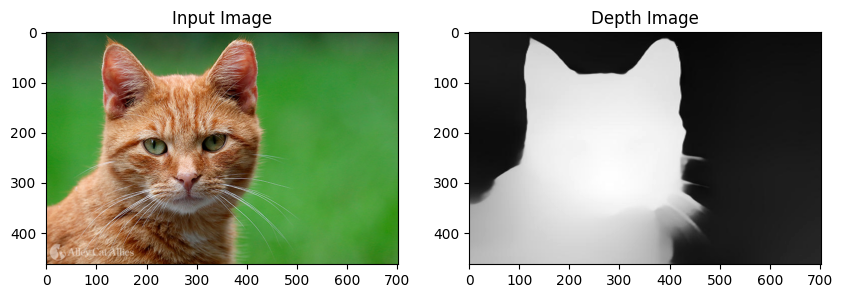

In [3]:
input_image = Image.open("../1_media/input_images/cat.jpg")
depth_image = Image.open("../1_media/input_images/cat_depth.jpg")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].title.set_text("Input Image")
ax[0].imshow(input_image)
ax[1].title.set_text("Depth Image")
ax[1].imshow(depth_image, cmap="gray")

/home/server/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/20 [00:00<?, ?it/s]

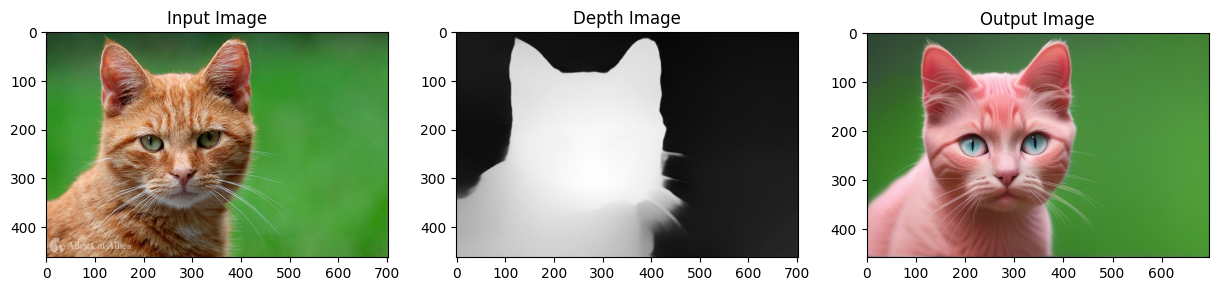

In [4]:
output_image = pipe_control(
    prompt = "a beautiful pink cat ",
    image=input_image,
    control_image= depth_image,
    height=input_image.height,
    width=input_image.width,
    num_inference_steps=25,
    generator = torch.Generator(device="cuda").manual_seed(42),
    strength=0.8
).images[0]

fig, ax = plt.subplots(1, 3 , figsize=(15, 5))
ax[0].title.set_text("Input Image")
ax[0].imshow(input_image)
ax[1].title.set_text("Depth Image")
ax[1].imshow(depth_image, cmap="gray")
ax[2].title.set_text("Output Image")
ax[2].imshow(output_image)